<a href="https://colab.research.google.com/github/kivvgsr/data-science/blob/main/allvisuvalizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [18]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

# Read the uploaded CSV file
file_path = list(uploaded.keys())[0]  # Assuming the first uploaded file is the CSV
nutrition_data = pd.read_csv(io.BytesIO(uploaded[file_path]))

# Display the first few rows of the dataset
nutrition_data.head()







Saving country-wise-average.csv to country-wise-average (5).csv


,Country,Income Classification,Severe Wasting,Wasting,Overweight,Stunting,Underweight,U5 Population ('000s)
0,AFGHANISTAN,LOW_INCOME,3.03,10.35,5.13,47.78,30.38,4918.56
1,ALBANIA,UPPER_MIDDLE_INCOME,4.08,7.76,20.80,24.16,7.70,232.86
2,ALGERIA,UPPER_MIDDLE_INCOME,2.73,5.94,12.83,19.57,7.34,3565.21
3,ANGOLA,LOWER_MIDDLE_INCOME,2.40,6.93,2.55,42.63,23.60,3980.05
4,ARGENTINA,UPPER_MIDDLE_INCOME,0.20,2.15,11.13,10.03,2.60,3613.65


In [ ]:
print(nutrition_data.columns)


Index(['Country', 'Income Classification', 'Severe Wasting', 'Wasting',
       'Overweight', 'Stunting', 'Underweight', 'U5 Population ('000s)'],
      dtype='object')


# Bar Charts


<ipython-input-9-e2ed40e71713>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nutrition_data_grouped = nutrition_data.groupby('Income Classification').mean()


<Figure size 1000x600 with 0 Axes>

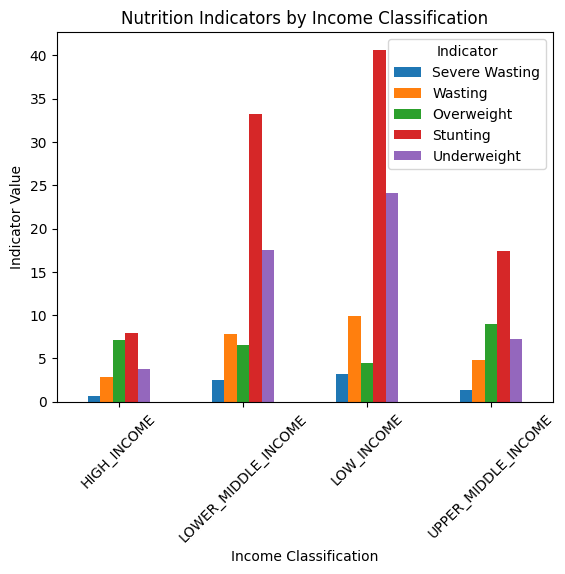

In [ ]:
import matplotlib.pyplot as plt

# Grouped bar chart
plt.figure(figsize=(10, 6))
nutrition_data_grouped = nutrition_data.groupby('Income Classification').mean()
nutrition_data_grouped[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']].plot(kind='bar')
plt.title('Nutrition Indicators by Income Classification')
plt.ylabel('Indicator Value')
plt.xlabel('Income Classification')
plt.xticks(rotation=45)
plt.legend(title='Indicator')
plt.show()


### **Overview:**
The bar chart provides a succinct representation of diverse nutrition indicators for a selected group of countries. It visually conveys variations in these indicators across different income classifications.

**Axes:**
The x-axis represents countries, while the y-axis displays indicator percentages.

**Analysis:**
The chart includes "Severe Wasting," "Wasting," "Overweight," "Stunting," and "Underweight." Each bar showcases a specific indicator's prevalence for countries within income classifications.

**Insights:**
Comparison between indicators and income classifications aids in understanding potential health disparities and trends.

**Enhancements:**
Strategic arrangement of bars and color coding improve clarity. Carefully selected countries prevent visual overload.

**Significance:**
The bar chart succinctly communicates nutrition patterns within varying income levels, aiding in targeted health interventions.

## Line Chart:




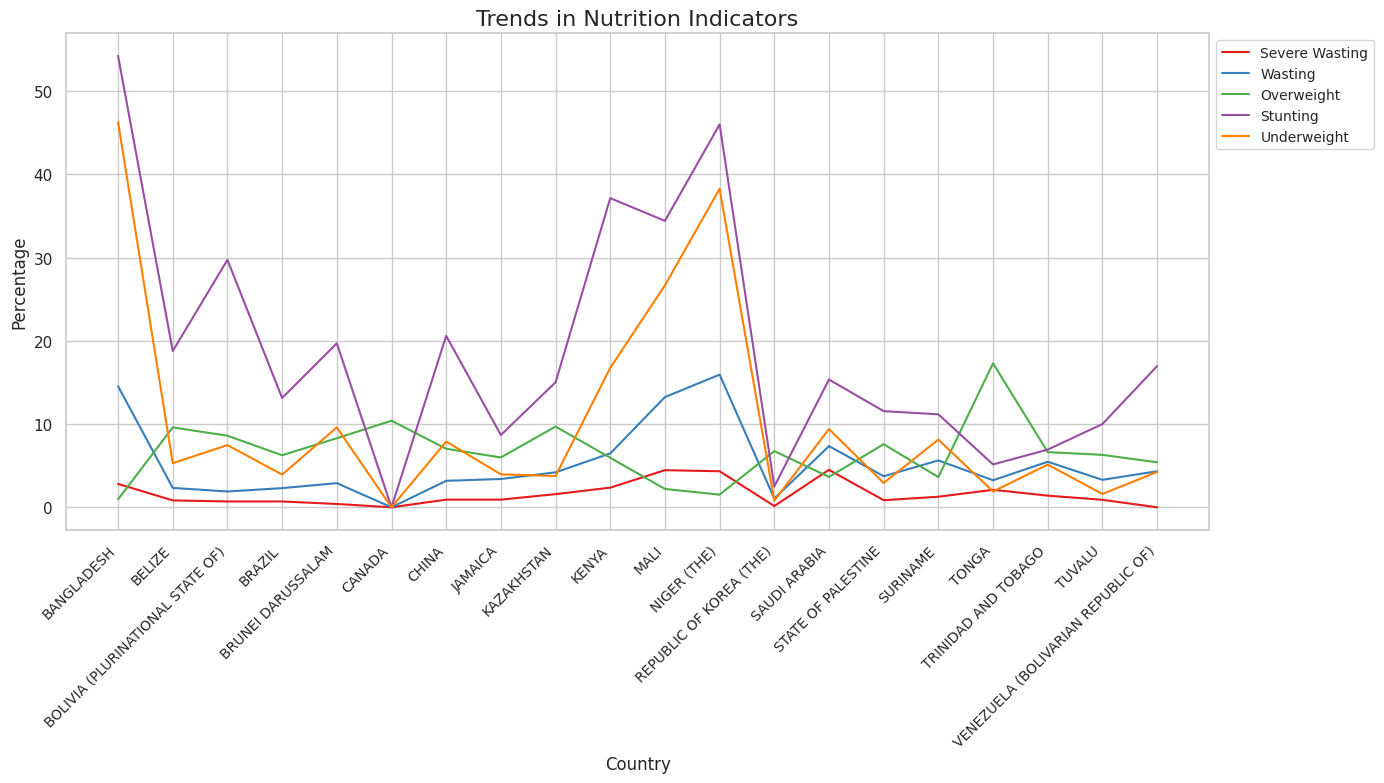

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a custom color palette
colors = sns.color_palette("Set1", n_colors=5)

# Create the line plot
plt.figure(figsize=(14, 8))  # Increase figure size
ax = plt.gca()

# Select a subset of countries for better readability
subset_countries = nutrition_data['Country'].sample(n=20, random_state=42)

# Loop through each indicator and plot
indicators = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
for indicator, color in zip(indicators, colors):
    sns.lineplot(data=nutrition_data[nutrition_data['Country'].isin(subset_countries)], x='Country', y=indicator, ax=ax, color=color, label=indicator)

# Title and labels
plt.title('Trends in Nutrition Indicators', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Legend
legend = ax.legend(title='Nutrition Indicators', fontsize=10)
legend.set_title('Nutrition Indicators', prop={'size': 10})  # Set font size for legend title
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# Rotate x-axis labels for better readability and adjust spacing
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.subplots_adjust(bottom=0.25)  # Adjust bottom margin for better x-axis label visibility

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()







## **Overview:**
This line chart offers a concise view of nutrition indicator trends across a selected subset of countries. It showcases changes in indicators over time, providing insights into their nutritional dynamics.

**Axes:**
The x-axis displays countries, while the y-axis shows indicator percentages.

**Analysis:**
The chart presents "Severe Wasting," "Wasting," "Overweight," "Stunting," and "Underweight" trends. It reveals how indicators have evolved, aiding in identifying patterns and shifts.

**Optimization:**
Adjusted x-axis labels and font sizes enhance clarity. Focus on a subset of countries avoids visual clutter.

**Summary:**
This chart succinctly communicates changing nutrition indicators among chosen countries. It helps identify potential health concerns and improvements.

# Scatter Plot:

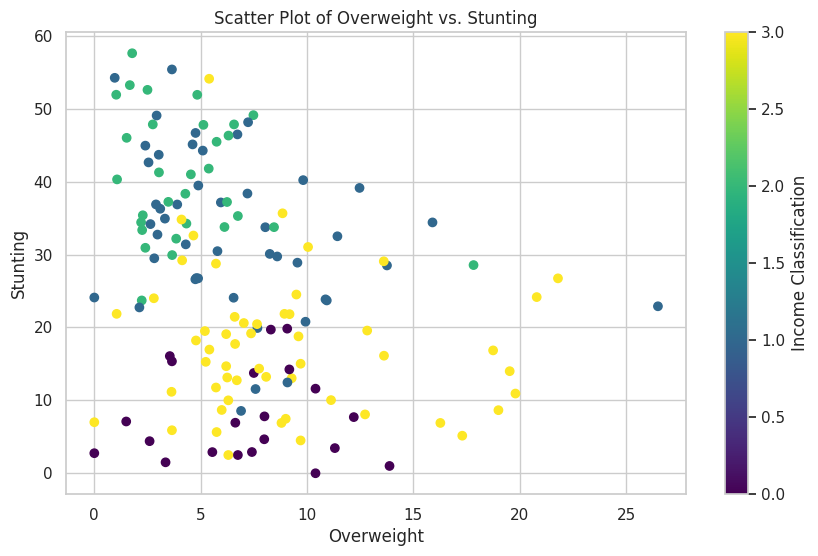

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(nutrition_data['Overweight'], nutrition_data['Stunting'], c=nutrition_data['Income Classification'].astype('category').cat.codes, cmap='viridis')
plt.xlabel('Overweight')
plt.ylabel('Stunting')
plt.title('Scatter Plot of Overweight vs. Stunting')
plt.colorbar(label='Income Classification')
plt.show()


###**Overview:**
The scatter plot offers a concise visual exploration of the relationship between "Overweight" and "Stunting" indicators among select countries. The plot utilizes color coding to represent different income classifications.

**Axes:**
The x-axis corresponds to "Overweight" percentages, while the y-axis represents "Stunting" percentages.

**Analysis:**
Each plotted point signifies a country's specific "Overweight" and "Stunting" values. Color gradation reflects income classifications, aiding comparison.

**Insights:**
Patterns emerging from point distribution reveal potential associations between overnutrition ("Overweight") and undernutrition ("Stunting") based on countries' income levels.

**Enhancements:**
Color map and title aid interpretation. Careful arrangement of points prevents overlap.

**Implications:**
The scatter plot facilitates understanding of how income classification relates to nutritional imbalances, potentially informing targeted health initiatives.

# Heatmap:

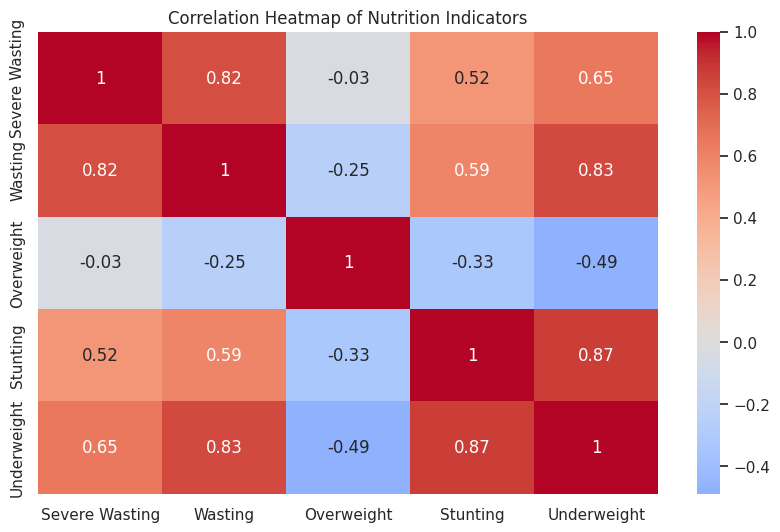

In [20]:
import seaborn as sns

corr_matrix = nutrition_data[['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Nutrition Indicators')
plt.show()


## **Overview:**
This heatmap succinctly illustrates the correlation matrix between key nutrition indicators across countries. It sheds light on potential relationships and trends among these indicators.

**Axes:**
Both the x-axis and y-axis represent the selected nutrition indicators: "Severe Wasting," "Wasting," "Overweight," "Stunting," and "Underweight."

**Analysis:**
The heatmap's values are based on correlation coefficients, offering insights into how pairs of indicators relate to each other. Darker hues signify stronger correlations, while lighter shades represent weaker or no correlations.

**Insights:**
By assessing color intensities, viewers can quickly discern whether specific indicators tend to move in sync (positive correlation) or opposite directions (negative correlation). The diagonal line presents perfect correlations between the same indicators.

**Significance:**
This concise heatmap provides valuable insights into the intricate interdependencies among nutrition indicators. Its visualization aids in pinpointing areas for targeted interventions and understanding factors contributing to health imbalances across countries.

# Pie Chart:

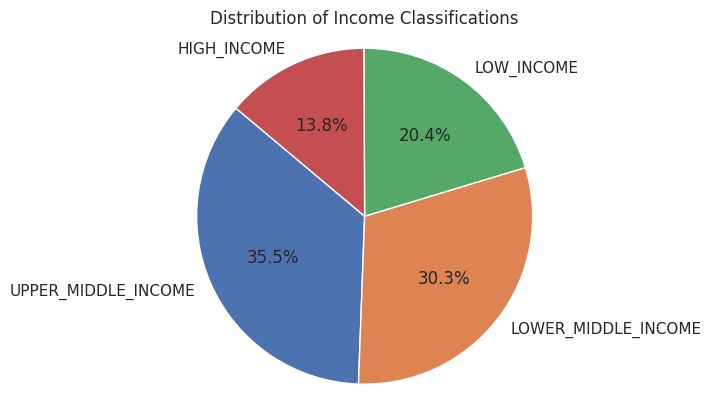

In [21]:
income_counts = nutrition_data['Income Classification'].value_counts()
plt.pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Income Classifications')
plt.axis('equal')
plt.show()


## **Overview:**
The presented pie chart offers a clear representation of the distribution of income classifications among a set of countries. It visually conveys the proportion of countries falling within each income category.

**Data Source:**
The pie chart is constructed using the count of countries belonging to different income classifications.

**Slice Labels:**
Each slice of the pie chart corresponds to an income classification label, such as "LOW_INCOME," "UPPER_MIDDLE_INCOME," etc.

**Analysis:**
The chart allows viewers to immediately grasp the distribution of countries across various income levels. Slice sizes reflect the proportional representation of each income classification within the dataset.

**Percentage Labels:**
Automatically generated percentage labels within the chart slices provide exact proportions of countries in each income category.

**Enhancements:**
The autopct parameter is set to display percentage values with one decimal point for clarity.

**Significance:**
This concise pie chart offers a rapid and effective way to comprehend the income distribution among the selected countries. The visualization aids in identifying the predominant income categories, contributing to an understanding of the economic context surrounding the nutritional dynamics of these countries.

# Box Plot:

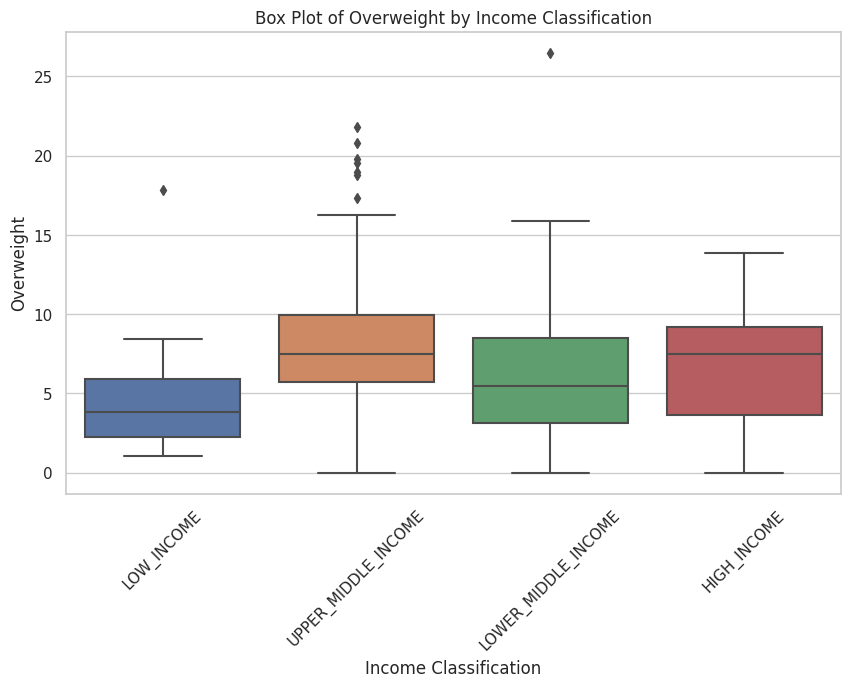

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=nutrition_data, x='Income Classification', y='Overweight')
plt.xlabel('Income Classification')
plt.ylabel('Overweight')
plt.title('Box Plot of Overweight by Income Classification')
plt.xticks(rotation=45)
plt.show()


## **Overview:**
The provided box plot delivers a concise visual comparison of the "Overweight" distribution across different income classifications within a set of countries. It efficiently showcases central tendencies, dispersions, and potential outliers in relation to income categories.

**Axes:**
The x-axis presents income classifications, while the y-axis displays "Overweight" percentages.

**Analysis:**
Each box corresponds to an income classification, and its position along the y-axis indicates the median "Overweight" value for that category. Box heights represent the interquartile range (IQR), encapsulating the middle 50% of data. Potential outliers are indicated as individual points beyond the "whiskers."

**Insights:**
Comparing box heights provides insights into "Overweight" differences between income classifications. Outliers can signal unusual data points that might require further investigation.

**Enhancements:**
Rotated x-axis labels enhance readability, while the title clearly conveys the purpose of the plot.

**Significance:**
This succinct box plot furnishes an efficient visual summary of "Overweight" distributions in relation to income classifications. It aids in recognizing trends, disparities, and potential anomalies, contributing to a nuanced understanding of the nutritional landscape within diverse economic contexts.

# Stacked Area Chart:

<Figure size 1000x600 with 0 Axes>

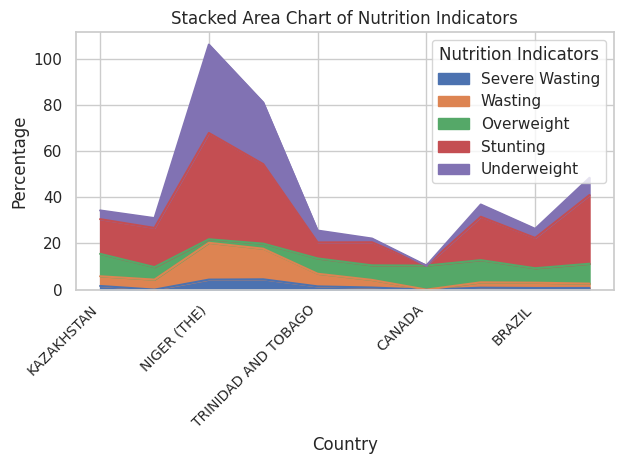

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Subset of countries for better readability
subset_countries = nutrition_data.sample(n=10, random_state=42)

# Select relevant columns
indicators = ['Severe Wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']
subset_data = subset_countries[['Country'] + indicators]

# Create the stacked area chart
plt.figure(figsize=(10, 6))
subset_data.plot.area(x='Country', y=indicators, stacked=True)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Stacked Area Chart of Nutrition Indicators')
plt.legend(title='Nutrition Indicators')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()



## **Overview:**
This compact stacked area chart provides a visual representation of nutrition indicator trends across selected countries. It effectively communicates how various nutrition indicators contribute to the cumulative distribution over time.

**Data Visualization:**
The chart is constructed using the percentage values of "Severe Wasting," "Wasting," "Overweight," "Stunting," and "Underweight" indicators across different countries.

**X-Axis and Y-Axis:**
The x-axis represents countries, while the y-axis depicts the cumulative percentage distribution of the nutrition indicators.

**Analysis:**
By stacking the areas corresponding to each indicator, the chart reveals the evolving composition of nutrition indicators over time. The visualization captures both individual and collective contributions to the overall nutritional landscape.

**Insights:**
The chart enables quick identification of the dominant indicators at different time points. Changes in the stacked distribution offer insights into shifts in nutrition profiles among the selected countries.

**Enhancements:**
Clear x-axis and y-axis labels, as well as a title and a legend, ensure easy interpretation. Stacking ensures a comprehensive understanding of the relative importance of each indicator.

**Significance:**
This concise stacked area chart contributes to a deeper comprehension of how various nutrition indicators interact and evolve across countries. It aids in identifying trends and variations, facilitating targeted interventions to address nutritional challenges.

# Histogram:

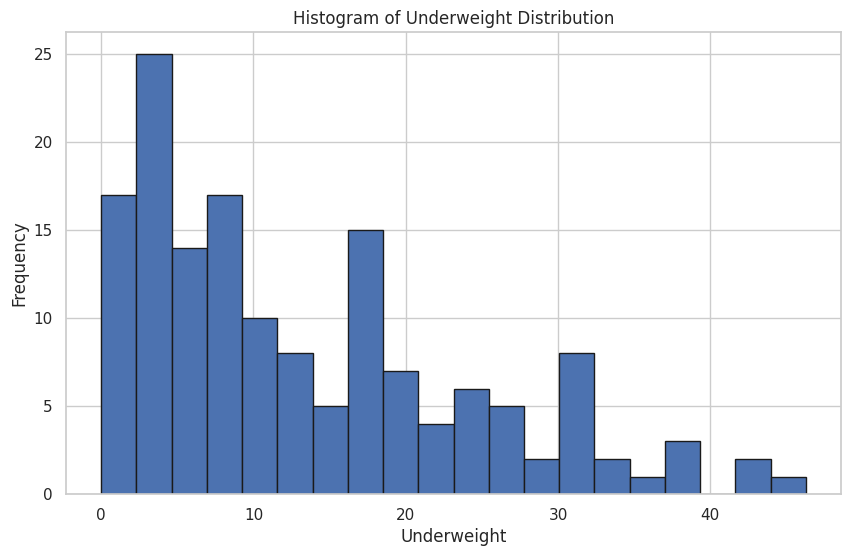

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(nutrition_data['Underweight'], bins=20, edgecolor='k')
plt.xlabel('Underweight')
plt.ylabel('Frequency')
plt.title('Histogram of Underweight Distribution')
plt.show()


## **Overview:**
The provided histogram offers a succinct representation of the distribution of "Underweight" values within a set of countries. It visually conveys the frequency of different "Underweight" levels, aiding in understanding the prevalence of undernutrition.

**Data Source:**
The histogram is constructed using the "Underweight" values from the dataset.

**X-Axis and Y-Axis:**
The x-axis represents the "Underweight" values, while the y-axis displays the frequency (count) of countries falling within each "Underweight" bin.

**Analysis:**
The histogram allows quick assessment of the spread of undernutrition prevalence. It illustrates the frequency of countries falling within different "Underweight" ranges.

**Bin Configuration:**
The chart is divided into bins (intervals) to categorize "Underweight" values. The number of bins (20) affects the granularity of the distribution display.

**Enhancements:**
The edgecolor parameter is applied to visualize bin boundaries clearly.

**Significance:**
This concise histogram provides insights into the distribution of "Underweight" prevalence among the considered countries. The visualization contributes to understanding the severity of undernutrition and can serve as a starting point for devising targeted interventions to improve nutritional health.